In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [4]:
x0 = np.array(list(sample_params(pta.params).values()))

In [5]:
pta.get_lnprior([-1, -14, -13])

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


-inf

In [6]:
chain = sample(pta.get_lnlikelihood, pta.get_lnprior, len(pta.params), x0, num_samples=1_000_000)

100%|██████████| 990/990 [02:23<00:00,  6.92it/s]


In [10]:
import corner

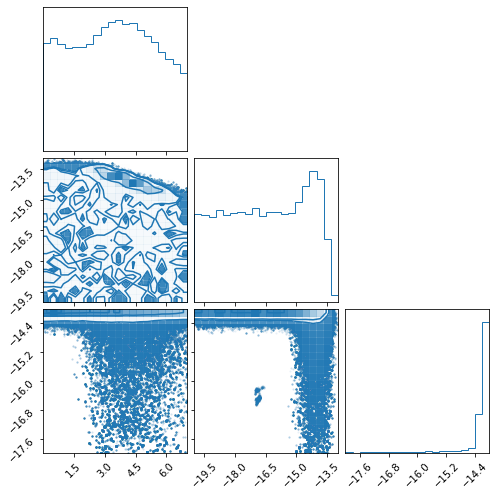

In [13]:
corner.corner(chain[:, :3], color='C0')
plt.show()